In [1]:
#import the nueral network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
#import the cnn layers
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

# image preprocessing (or) data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train =train_datagen.flow_from_directory("./Dataset/train",target_size=(64,64),batch_size=32,class_mode="categorical")


Found 15341 images belonging to 6 classes.


In [7]:
x_test = test_datagen.flow_from_directory("./Dataset/test",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 6825 images belonging to 6 classes.


In [8]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [9]:
#initialize the model
model=Sequential()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [10]:
#convolutional model
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [11]:
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Convolution2D(16,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
#flatten layer
model.add(Flatten())

In [14]:
model.add(Dense(units=300,activation="relu",kernel_initializer="random_uniform"))

In [15]:
model.add(Dense(units=200,activation="relu",kernel_initializer="random_uniform"))

# output layer


In [16]:
model.add(Dense(units=6,activation="softmax",kernel_initializer="random_uniform"))

# compile model

In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# train your  model

In [18]:
tr=model.fit_generator(x_train,steps_per_epoch=480,epochs=25,validation_data=x_test,validation_steps=10)
#steps_per_epoch =>total trainging images/batch size
#validation_steps=>total testing images/batch size

Epoch 1/25


/var/folders/m3/ltc04s6x59x86d1lvb7rdll00000gn/T/ipykernel_5181/1370298909.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  tr=model.fit_generator(x_train,steps_per_epoch=480,epochs=25,validation_data=x_test,validation_steps=10)
2023-11-26 19:44:15.171957: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


480/480 [==============================] - 17s 31ms/step - loss: 1.2698 - accuracy: 0.5406 - val_loss: 1.3764 - val_accuracy: 0.5156
Epoch 2/25
480/480 [==============================] - 14s 28ms/step - loss: 0.5748 - accuracy: 0.8066 - val_loss: 0.8510 - val_accuracy: 0.7500
Epoch 3/25
480/480 [==============================] - 14s 28ms/step - loss: 0.3009 - accuracy: 0.9054 - val_loss: 0.6209 - val_accuracy: 0.8375
Epoch 4/25
480/480 [==============================] - 13s 27ms/step - loss: 0.1990 - accuracy: 0.9383 - val_loss: 0.6069 - val_accuracy: 0.8438
Epoch 5/25
480/480 [==============================] - 12s 24ms/step - loss: 0.1645 - accuracy: 0.9510 - val_loss: 0.5581 - val_accuracy: 0.8438
Epoch 6/25
480/480 [==============================] - 13s 26ms/step - loss: 0.1410 - accuracy: 0.9555 - val_loss: 0.4063 - val_accuracy: 0.8938
Epoch 7/25
480/480 [==============================] - 11s 23ms/step - loss: 0.1220 - accuracy: 0.9619 - val_loss: 0.3913 - val_accuracy: 0.8625
Epo

In [19]:
tr.history

{'loss': [1.2698230743408203,
  0.5747998356819153,
  0.30088064074516296,
  0.1989784985780716,
  0.16448214650154114,
  0.1409921944141388,
  0.12201691418886185,
  0.10835602879524231,
  0.09503420442342758,
  0.08824721723794937,
  0.07656637579202652,
  0.07021509110927582,
  0.06466928869485855,
  0.06107514724135399,
  0.055514074862003326,
  0.052552636712789536,
  0.04703949764370918,
  0.044835954904556274,
  0.04003624618053436,
  0.038279157131910324,
  0.0413832925260067,
  0.03549370914697647,
  0.03556213155388832,
  0.034806206822395325,
  0.030550874769687653],
 'accuracy': [0.5405775308609009,
  0.8065966963768005,
  0.9054168462753296,
  0.9382699728012085,
  0.9510462284088135,
  0.9555439949035645,
  0.9619320631027222,
  0.9670165181159973,
  0.9698846340179443,
  0.9725571870803833,
  0.9747083187103271,
  0.9760119915008545,
  0.9775112271308899,
  0.9805097579956055,
  0.9813571572303772,
  0.9817482829093933,
  0.9835734367370605,
  0.9847467541694641,
  0.986

# To save the best accuracy got in the epoch we willn use this callback and checkpoint

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model_{epoch:02d}.h5",monitor="val_accuracy",save_best_only=True,mode="Max")
tr = model.fit_generator(x_train,steps_per_epoch=480,callbacks=[checkpoint],validation_steps=10)

  4/480 [..............................] - ETA: 10s - loss: 0.0247 - accuracy: 0.9922

/var/folders/m3/ltc04s6x59x86d1lvb7rdll00000gn/T/ipykernel_5181/1474106966.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  tr = model.fit_generator(x_train,steps_per_epoch=480,callbacks=[checkpoint],validation_steps=10)


480/480 [==============================] - 11s 22ms/step - loss: 0.0273 - accuracy: 0.9904


# Saving the model

In [21]:
#for storing temporary
model.save('ECG.h5')

In [29]:
losses=tr.history['loss']
accuracy=tr.history['accuracy']
epochs=list(range(1,26))

ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

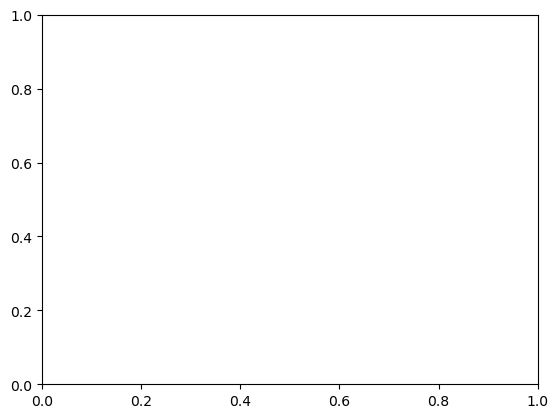

In [28]:
import matplotlib.pyplot as plt
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (25,) and (1,)

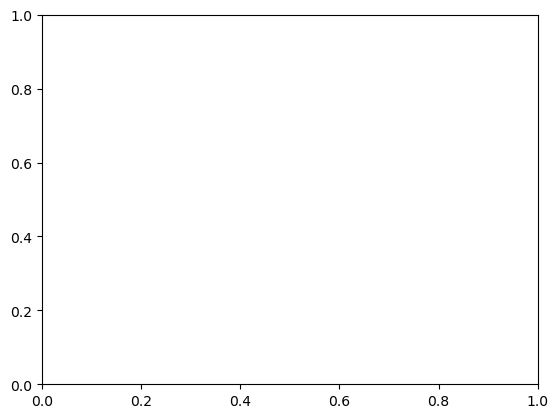

In [24]:
plt.plot(epochs,accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [25]:
losses=tr.history['loss']
accuracy=tr.history['accuracy']
val_accuarcy=tr.history['val_accuracy']
epochs=list(range(1,26))


KeyError: 'val_accuracy'

In [26]:
plt.plot(epochs,val_accuarcy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

NameError: name 'val_accuarcy' is not defined